In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

import coremltools

In [24]:
data = pd.read_csv("healthdata-4.csv")
x =data[['Age','Family_History','Under_Medication','Academic_Performance','Behavioral_Problem',
         'Concentration','Restless','Seizures','Learning_Difficulty',
        'Attention_Aroused','Attention_Sustained','IQ_Test_Score','ADHD_Positive','ODD_Positive','Manic_Episode_Test_Score','General_Anxiety_Disorder','Major_Depressive_Episode','PDD_Score','Autism_Score']].values
x.astype(float)
print(x)

x.shape
x.shape
y =data['Problem'].values
y.shape

[[2 1 1 ... 0 2 1]
 [3 0 0 ... 1 0 2]
 [0 0 0 ... 0 0 1]
 ...
 [1 1 0 ... 0 1 0]
 [3 1 1 ... 0 0 0]
 [0 0 0 ... 1 1 2]]


(10000,)

In [25]:
scale = MinMaxScaler()
scale.fit(x)
ad = scale.fit_transform(x)
np.set_printoptions(precision=2)
#data = pd.DataFrame(ad)
#print(ad)
n = data.shape[0]
n_train = int(np.round(n * .08))
limit = n_train+200
print(n_train)
disease_X_train = ad[:n_train,0:19] #
disease_X_test = ad[n_train:limit, 0:19]
#print(disease_X_train.shape)
#print(disease_X_test.shape)
disease_y_train = y[:n_train]
disease_y_test = y[n_train:limit]

logreg = LogisticRegression(solver='lbfgs')
logreg.fit(disease_X_train, disease_y_train)
disease_y_pred1 = logreg.predict(disease_X_test)
mse= mean_squared_error(disease_y_test, disease_y_pred1)
Testing_accuracy = np.sqrt(mse)
print('Testing_accuracy of Logistic Regression')
print(Testing_accuracy)
knn1 = KNeighborsClassifier(n_neighbors = 5)
knn1.fit(disease_X_train,disease_y_train)
y_pred1 = knn1.predict(disease_X_test)
print('knn accuracy')
mse = metrics.accuracy_score(disease_y_test, disease_y_pred1)
#print(disease_y_pred1.shape)
accu = np.sqrt(mse)
print(accu)

from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, x, y, cv = 10, scoring = 'accuracy')
ms = np.sqrt(scores)
print(scores)
knn = KNeighborsClassifier(n_neighbors = 5)
scores =cross_val_score(knn, x, y, cv = 10, scoring = 'accuracy')
print("knn_cross_val")
rms = np.sqrt(scores)
print(rms)
scor1 = cross_val_score(logreg, x, y, cv=10, scoring='accuracy')
rm = np.sqrt(scor1)
print(rm)
k_range = list(range(1, 31))
#param_grid = dict(n_neighbors=k_range)
#print(param_grid)
from sklearn.model_selection import GridSearchCV

print(metrics.confusion_matrix(disease_y_test, disease_y_pred1))

/Users/adhrimuna/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


800
Testing_accuracy of Logistic Regression
0.6855654600401044
knn accuracy
0.7280109889280518
[0.48 0.48 0.51 0.51 0.5  0.51 0.46 0.5  0.52 0.5 ]
knn_cross_val
[0.7  0.69 0.72 0.72 0.71 0.71 0.68 0.71 0.72 0.7 ]
[0.71 0.72 0.71 0.69 0.7  0.73 0.71 0.72 0.72 0.71]
[[54 49]
 [45 52]]


In [9]:
print('True:', disease_y_test[0:25])
print('Pred:', disease_y_pred1[0:25])

True: [0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 0]
Pred: [0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1]


In [10]:
confusion = metrics.confusion_matrix(disease_y_test, disease_y_pred1)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [12]:
print("Classification Rate")
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(disease_y_test, disease_y_pred1))

Classification Rate
0.53
0.53


In [13]:
print(logreg.predict(disease_X_test)[0:10])
logreg.predict_proba(disease_X_test)[0:10, :]
y_pred_prob = logreg.predict_proba(disease_X_test)[:, 1]

[0 1 0 0 0 0 0 1 1 0]


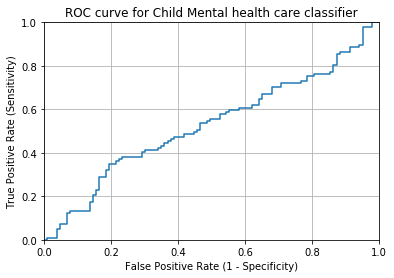

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(disease_y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Child Mental health care classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [15]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [16]:
evaluate_threshold(0.5)

Sensitivity: 0.5360824742268041
Specificity: 0.5339805825242718


In [17]:
evaluate_threshold(0.4)



Sensitivity: 0.7731958762886598
Specificity: 0.13592233009708743


In [18]:
print(metrics.roc_auc_score(disease_y_test, y_pred_prob))
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, x, y, cv=10, scoring='roc_auc').mean()

0.5283755379841857


0.5092869738228896

In [31]:
from sklearn.linear_model import LogisticRegression
input_features = ["Age","Family_History","Under_Medication","Academic_Performance","Behavioral_Problem",
         "Concentration","Restless","Seizures","Learning_Difficulty",
        "Major_Depressive_Episode"]
output_feature = "Problem"

logreg.fit(data[input_features],data[output_feature])
#logreg.score()
x_new =[2,1,0,1,0,0,0,1,1,0]
m = logreg.predict([x_new])
print(m)
coreml_model = coremltools.converters.sklearn.convert(logreg,
                                                         input_features,
                                                         output_feature)
coreml_model.save('LogisticFinal.mlmodel')

[0]


In [ ]:
2,1,1,1,1,0,1,1,0,1